<a href="https://colab.research.google.com/github/Mruthukrish/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('twitter_training.csv')
validation_data = pd.read_csv('twitter_validation.csv')

In [ ]:
data = pd.concat([train_data, validation_data])

In [ ]:
# Inspect the data
print(data.head())

     2401  Borderlands  Positive  \
0  2401.0  Borderlands  Positive   
1  2401.0  Borderlands  Positive   
2  2401.0  Borderlands  Positive   
3  2401.0  Borderlands  Positive   
4  2401.0  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  3364 Facebook  \
0  I am coming to the borders and I will kill you...      NaN      NaN   
1  im getting on borderlands and i will kill you ...      NaN      NaN   
2  im coming on borderlands and i will murder you...      NaN      NaN   
3  im getting on borderlands 2 and i will murder ...      NaN      NaN   
4  im getting into borderlands and i can murder y...      NaN      NaN   

  Irrelevant  \
0        NaN   
1        NaN   
2        NaN   
3        NaN   
4        NaN   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible perso

In [ ]:
# Define a function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\s+', ' ', text)     # Remove extra whitespace
    return text.strip()

In [ ]:
# Display the column names of the dataframe
print(data.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# Rename columns for easier access
data.columns = ['id1', 'topic', 'label', 'short_text', 'id2', 'platform', 'label2', 'long_text']


In [ ]:
# Check the data types of each column
print(data.dtypes)


id1           float64
topic          object
label          object
short_text     object
id2           float64
platform       object
label2         object
long_text      object
dtype: object


In [ ]:
# Ensure all values are strings to avoid TypeError
data['sentiment'] = data['long_text'].astype(str).apply(get_sentiment)


<ipython-input-27-58f15e77cd3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


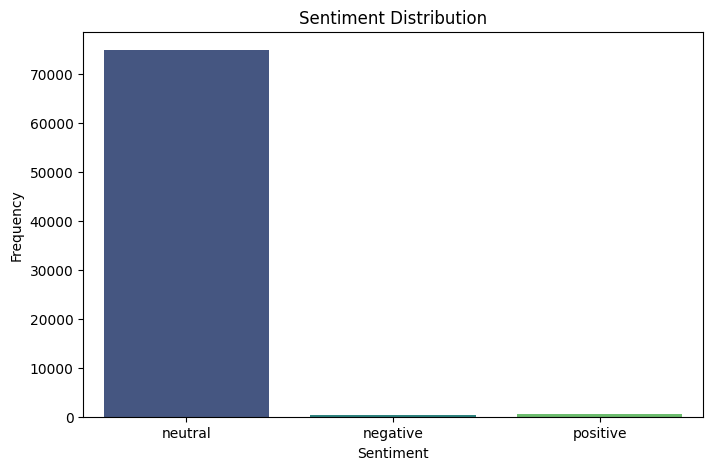

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()